In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_one_data = []
position_two_data = []
position_three_data = []
position_four_data = []
position_five_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_one_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_two_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_three_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_four_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[3:-1])
    position_five_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_one_data = np.array(position_one_data, dtype=float)
position_two_data = np.array(position_two_data, dtype=float)
position_three_data = np.array(position_three_data, dtype=float)
position_four_data = np.array(position_four_data, dtype=float)
position_five_data = np.array(position_five_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
position_one_data = (position_one_data-no_hole_data)
position_two_data = (position_two_data-no_hole_data)
position_three_data = (position_three_data-no_hole_data)
position_four_data = (position_four_data-no_hole_data)
position_five_data = (position_five_data-no_hole_data)
# size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = position_y_data/50
# position_y_data = keras.utils.to_categorical(position_y_data, 25)
print(size_y_data.shape)
print(size_x_data.shape)
print(size_y_data)
print(size_x_data)
print(position_y_data.shape)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

(10135,)
(10135, 50)
[1 1 1 ... 5 5 5]
[[ 2.557784  2.543381  2.538138 ... -3.468686 -3.537617 -3.560005]
 [ 2.544622  2.527179  2.525716 ... -3.468703 -3.537634 -3.560022]
 [ 2.510082  2.489366  2.468944 ... -3.468758 -3.537691 -3.560078]
 ...
 [ 2.861055  2.839368  2.812215 ... -2.791348 -2.856525 -2.87767 ]
 [ 2.869751  2.848063  2.820905 ... -2.764584 -2.829577 -2.850659]
 [ 2.863524  2.841838  2.814688 ... -2.774301 -2.839327 -2.86042 ]]
(10135, 2)


In [4]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(1, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [5]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Epoch 1/1000
64/64 [==============================] - 0s 5ms/step - loss: 2.7109 - accuracy: 0.2087 - val_loss: 2.1293 - val_accuracy: 0.2259
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.9897 - accuracy: 0.2160 - val_loss: 2.0369 - val_accuracy: 0.2259
Epoch 3/1000
64/64 [==============================] - 0s 4ms/step - loss: 1.8928 - accuracy: 0.2160 - val_loss: 1.9480 - val_accuracy: 0.2259
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.8038 - accuracy: 0.2160 - val_loss: 1.8260 - val_accuracy: 0.2259
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.6910 - accuracy: 0.2160 - val_loss: 1.6983 - val_accuracy: 0.2259
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.5518 - accuracy: 0.2158 - val_loss: 1.5570 - val_accuracy: 0.2255
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.4170 - accuracy: 0.2158 - val_loss: 1.3997 - val_accuracy: 0.2255
Epoch 

64/64 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.2148 - val_loss: 0.2295 - val_accuracy: 0.2245
Epoch 59/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.2146 - val_loss: 0.2364 - val_accuracy: 0.2245
Epoch 60/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.2146 - val_loss: 0.2300 - val_accuracy: 0.2245
Epoch 61/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.2147 - val_loss: 0.2315 - val_accuracy: 0.2245
Epoch 62/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.2147 - val_loss: 0.2273 - val_accuracy: 0.2245
Epoch 63/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.2151 - val_loss: 0.2315 - val_accuracy: 0.2245
Epoch 64/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.2148 - val_loss: 0.2203 - val_accuracy: 0.2245
Epoch 65/1000

Epoch 115/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.2147 - val_loss: 0.1671 - val_accuracy: 0.2245
Epoch 116/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.2147 - val_loss: 0.1653 - val_accuracy: 0.2245
Epoch 117/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.2147 - val_loss: 0.1666 - val_accuracy: 0.2245
Epoch 118/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1698 - accuracy: 0.2148 - val_loss: 0.1677 - val_accuracy: 0.2245
Epoch 119/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.2150 - val_loss: 0.1797 - val_accuracy: 0.2245
Epoch 120/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.2147 - val_loss: 0.1677 - val_accuracy: 0.2245
Epoch 121/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.2147 - val_loss: 0.1703 - val_accuracy:

Epoch 172/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.2146 - val_loss: 0.1411 - val_accuracy: 0.2245
Epoch 173/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.2150 - val_loss: 0.1420 - val_accuracy: 0.2245
Epoch 174/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1464 - accuracy: 0.2148 - val_loss: 0.1477 - val_accuracy: 0.2245
Epoch 175/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.2146 - val_loss: 0.1431 - val_accuracy: 0.2245
Epoch 176/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.2148 - val_loss: 0.1479 - val_accuracy: 0.2245
Epoch 177/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.2148 - val_loss: 0.1408 - val_accuracy: 0.2245
Epoch 178/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.2150 - val_loss: 0.1396 - val_accuracy:

Epoch 229/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.2148 - val_loss: 0.1366 - val_accuracy: 0.2245
Epoch 230/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1362 - accuracy: 0.2148 - val_loss: 0.1673 - val_accuracy: 0.2245
Epoch 231/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.2148 - val_loss: 0.1456 - val_accuracy: 0.2245
Epoch 232/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1414 - accuracy: 0.2148 - val_loss: 0.1412 - val_accuracy: 0.2245
Epoch 233/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.2148 - val_loss: 0.1316 - val_accuracy: 0.2245
Epoch 234/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.2147 - val_loss: 0.1277 - val_accuracy: 0.2245
Epoch 235/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.2147 - val_loss: 0.1301 - val_accuracy:

Epoch 286/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.2146 - val_loss: 0.1199 - val_accuracy: 0.2245
Epoch 287/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.2148 - val_loss: 0.1203 - val_accuracy: 0.2245
Epoch 288/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.2147 - val_loss: 0.1208 - val_accuracy: 0.2245
Epoch 289/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.2148 - val_loss: 0.1194 - val_accuracy: 0.2245
Epoch 290/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.2147 - val_loss: 0.1207 - val_accuracy: 0.2245
Epoch 291/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1210 - accuracy: 0.2148 - val_loss: 0.1193 - val_accuracy: 0.2245
Epoch 292/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.2148 - val_loss: 0.1201 - val_accuracy:

Epoch 343/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.2148 - val_loss: 0.1137 - val_accuracy: 0.2245
Epoch 344/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.2145 - val_loss: 0.1220 - val_accuracy: 0.2245
Epoch 345/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.2145 - val_loss: 0.1342 - val_accuracy: 0.2245
Epoch 346/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.2146 - val_loss: 0.1404 - val_accuracy: 0.2245
Epoch 347/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.2147 - val_loss: 0.1266 - val_accuracy: 0.2245
Epoch 348/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.2147 - val_loss: 0.1307 - val_accuracy: 0.2245
Epoch 349/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.2145 - val_loss: 0.1134 - val_accuracy:

Epoch 400/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.2142 - val_loss: 0.1148 - val_accuracy: 0.2245
Epoch 401/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.2145 - val_loss: 0.1168 - val_accuracy: 0.2240
Epoch 402/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.2145 - val_loss: 0.1087 - val_accuracy: 0.2245
Epoch 403/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.2147 - val_loss: 0.1098 - val_accuracy: 0.2245
Epoch 404/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.2148 - val_loss: 0.1237 - val_accuracy: 0.2240
Epoch 405/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.2144 - val_loss: 0.1103 - val_accuracy: 0.2245
Epoch 406/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.2146 - val_loss: 0.1294 - val_accuracy:

Epoch 457/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.2145 - val_loss: 0.1044 - val_accuracy: 0.2245
Epoch 458/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.2146 - val_loss: 0.1085 - val_accuracy: 0.2245
Epoch 459/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.2144 - val_loss: 0.1046 - val_accuracy: 0.2245
Epoch 460/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.2145 - val_loss: 0.1047 - val_accuracy: 0.2245
Epoch 461/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.2144 - val_loss: 0.1049 - val_accuracy: 0.2245
Epoch 462/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.2146 - val_loss: 0.1083 - val_accuracy: 0.2240
Epoch 463/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.2146 - val_loss: 0.1039 - val_accuracy:

Epoch 514/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.2145 - val_loss: 0.1137 - val_accuracy: 0.2240
Epoch 515/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.2142 - val_loss: 0.1022 - val_accuracy: 0.2245
Epoch 516/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.2146 - val_loss: 0.1046 - val_accuracy: 0.2245
Epoch 517/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.2142 - val_loss: 0.1156 - val_accuracy: 0.2245
Epoch 518/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.2145 - val_loss: 0.1143 - val_accuracy: 0.2240
Epoch 519/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.2145 - val_loss: 0.1018 - val_accuracy: 0.2245
Epoch 520/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.2144 - val_loss: 0.1038 - val_accuracy:

Epoch 571/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.2145 - val_loss: 0.1108 - val_accuracy: 0.2245
Epoch 572/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.2142 - val_loss: 0.1103 - val_accuracy: 0.2245
Epoch 573/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.2145 - val_loss: 0.1108 - val_accuracy: 0.2240
Epoch 574/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.2145 - val_loss: 0.1020 - val_accuracy: 0.2245
Epoch 575/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.2146 - val_loss: 0.1005 - val_accuracy: 0.2240
Epoch 576/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.1008 - accuracy: 0.2144 - val_loss: 0.1142 - val_accuracy: 0.2240
Epoch 577/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.2144 - val_loss: 0.1170 - val_accuracy:

Epoch 628/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.2142 - val_loss: 0.0988 - val_accuracy: 0.2240
Epoch 629/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.2146 - val_loss: 0.1027 - val_accuracy: 0.2240
Epoch 630/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.2144 - val_loss: 0.0978 - val_accuracy: 0.2240
Epoch 631/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.2147 - val_loss: 0.0981 - val_accuracy: 0.2240
Epoch 632/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.2142 - val_loss: 0.0996 - val_accuracy: 0.2240
Epoch 633/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.2144 - val_loss: 0.0978 - val_accuracy: 0.2240
Epoch 634/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.2146 - val_loss: 0.0978 - val_accuracy:

Epoch 685/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.2144 - val_loss: 0.0965 - val_accuracy: 0.2240
Epoch 686/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.2144 - val_loss: 0.0973 - val_accuracy: 0.2240
Epoch 687/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.2147 - val_loss: 0.1073 - val_accuracy: 0.2245
Epoch 688/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.2144 - val_loss: 0.1587 - val_accuracy: 0.2245
Epoch 689/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.2145 - val_loss: 0.1020 - val_accuracy: 0.2240
Epoch 690/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.2146 - val_loss: 0.1029 - val_accuracy: 0.2245
Epoch 691/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.2144 - val_loss: 0.0999 - val_accuracy:

Epoch 742/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.2145 - val_loss: 0.0957 - val_accuracy: 0.2245
Epoch 743/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.2145 - val_loss: 0.1127 - val_accuracy: 0.2225
Epoch 744/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.2146 - val_loss: 0.0936 - val_accuracy: 0.2240
Epoch 745/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.2144 - val_loss: 0.1032 - val_accuracy: 0.2245
Epoch 746/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.2144 - val_loss: 0.0983 - val_accuracy: 0.2245
Epoch 747/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.2144 - val_loss: 0.0951 - val_accuracy: 0.2240
Epoch 748/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.2144 - val_loss: 0.1020 - val_accuracy:

Epoch 799/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.2146 - val_loss: 0.1103 - val_accuracy: 0.2235
Epoch 800/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.2145 - val_loss: 0.1035 - val_accuracy: 0.2240
Epoch 801/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.2146 - val_loss: 0.0946 - val_accuracy: 0.2240
Epoch 802/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.2145 - val_loss: 0.0932 - val_accuracy: 0.2240
Epoch 803/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.2145 - val_loss: 0.0967 - val_accuracy: 0.2240
Epoch 804/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.2144 - val_loss: 0.0931 - val_accuracy: 0.2240
Epoch 805/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.2145 - val_loss: 0.0975 - val_accuracy:

Epoch 856/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.2142 - val_loss: 0.0944 - val_accuracy: 0.2240
Epoch 857/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0842 - accuracy: 0.2141 - val_loss: 0.0961 - val_accuracy: 0.2240
Epoch 858/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.2145 - val_loss: 0.0949 - val_accuracy: 0.2240
Epoch 859/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.2146 - val_loss: 0.0919 - val_accuracy: 0.2240
Epoch 860/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.2142 - val_loss: 0.0919 - val_accuracy: 0.2240
Epoch 861/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.2144 - val_loss: 0.0935 - val_accuracy: 0.2240
Epoch 862/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.2144 - val_loss: 0.1089 - val_accuracy:

Epoch 913/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.2145 - val_loss: 0.0897 - val_accuracy: 0.2240
Epoch 914/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.2146 - val_loss: 0.0926 - val_accuracy: 0.2240
Epoch 915/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.0819 - accuracy: 0.2145 - val_loss: 0.0899 - val_accuracy: 0.2240
Epoch 916/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.2145 - val_loss: 0.1002 - val_accuracy: 0.2235
Epoch 917/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.2144 - val_loss: 0.0893 - val_accuracy: 0.2240
Epoch 918/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.2146 - val_loss: 0.0909 - val_accuracy: 0.2240
Epoch 919/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.2145 - val_loss: 0.0922 - val_accuracy:

Epoch 970/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.2144 - val_loss: 0.0879 - val_accuracy: 0.2240
Epoch 971/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.2144 - val_loss: 0.0921 - val_accuracy: 0.2240
Epoch 972/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.2146 - val_loss: 0.0941 - val_accuracy: 0.2240
Epoch 973/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.2145 - val_loss: 0.0873 - val_accuracy: 0.2240
Epoch 974/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.2142 - val_loss: 0.0892 - val_accuracy: 0.2240
Epoch 975/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.2145 - val_loss: 0.0948 - val_accuracy: 0.2240
Epoch 976/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.2144 - val_loss: 0.0938 - val_accuracy:

In [6]:
predict = size_model.predict(size_x_test)
all_count = 0
correct = 0
for i in range(len(predict)):
    all_count = all_count + 1
    if (abs(predict[i]-size_y_test[i])<0.5):
        correct = correct + 1
print(correct/all_count)
print(predict)

0.9230389738529847
[[1.3700812]
 [2.1414104]
 [5.114234 ]
 ...
 [2.0024416]
 [5.537039 ]
 [1.2763795]]


In [7]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

64/64 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.2240
Test loss: 0.09185121208429337
Test accuracy: 0.22397631406784058


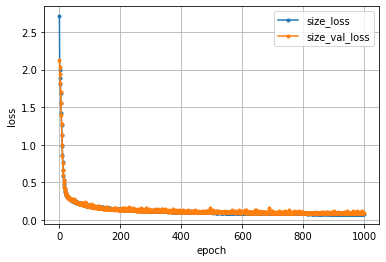

In [8]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
size_loss[-10:-1]

[0.08112257719039917,
 0.08159168064594269,
 0.08128109574317932,
 0.08021559566259384,
 0.08247949182987213,
 0.08091028034687042,
 0.08014179021120071,
 0.08680445700883865,
 0.08392351120710373]

In [10]:
print(size_y_test[0:3])
size_predict = size_model.predict(size_x_test)
print(size_predict[0:3])

[1 2 5]
[[1.3700812]
 [2.1414104]
 [5.114234 ]]


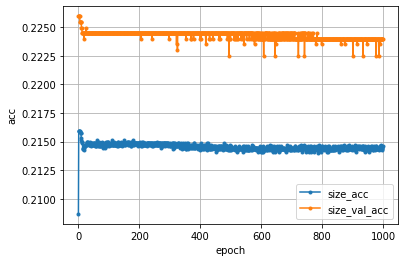

In [11]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [12]:
#大きさごとの推定精度の確認
size_predict = size_model.predict(size_x_test)
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.13537117903930132
大きさ2の正答率：0.8939759036144578
大きさ3の正答率：0.9473684210526315
大きさ4の正答率：0.9702233250620348
大きさ5の正答率：0.9973045822102425


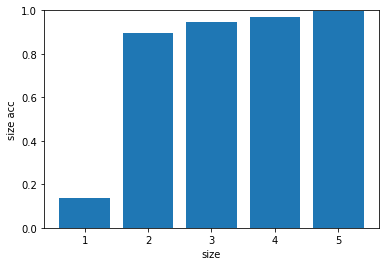

In [13]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

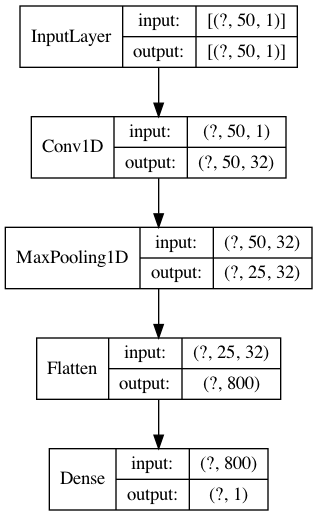

In [16]:
from keras.utils import plot_model
plot_model(size_model, show_shapes=True, show_layer_names=False)

In [3]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(2, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

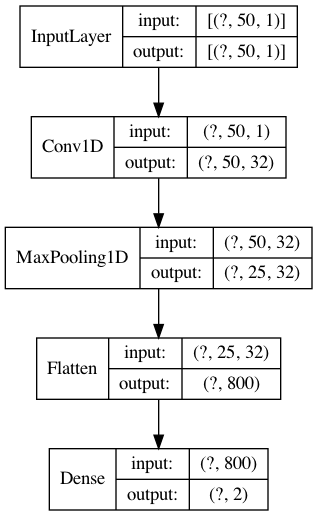

In [5]:
from keras.utils import plot_model
plot_model(position_model, show_shapes=True, show_layer_names=False)

In [7]:
# 学習(位置)
epochs = 1000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Epoch 1/1000
64/64 [==============================] - 0s 6ms/step - loss: 0.0692 - accuracy: 0.6022 - val_loss: 0.0594 - val_accuracy: 0.6177
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.6734 - val_loss: 0.0544 - val_accuracy: 0.7070
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.7184 - val_loss: 0.0512 - val_accuracy: 0.7287
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.7102 - val_loss: 0.0501 - val_accuracy: 0.6838
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.6896 - val_loss: 0.0485 - val_accuracy: 0.8066
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.7308 - val_loss: 0.0487 - val_accuracy: 0.8189
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.7305 - val_loss: 0.0481 - val_accuracy: 0.8352
Epoch 

64/64 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.7667 - val_loss: 0.0397 - val_accuracy: 0.7607
Epoch 116/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.7697 - val_loss: 0.0414 - val_accuracy: 0.7849
Epoch 117/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.7736 - val_loss: 0.0406 - val_accuracy: 0.7316
Epoch 118/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.7684 - val_loss: 0.0403 - val_accuracy: 0.7815
Epoch 119/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.7689 - val_loss: 0.0394 - val_accuracy: 0.7874
Epoch 120/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.7712 - val_loss: 0.0413 - val_accuracy: 0.7943
Epoch 121/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.7641 - val_loss: 0.0402 - val_accuracy: 0.7992
Epoch 1

Epoch 172/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.7473 - val_loss: 0.0400 - val_accuracy: 0.7390
Epoch 173/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.7686 - val_loss: 0.0395 - val_accuracy: 0.7795
Epoch 174/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.7720 - val_loss: 0.0401 - val_accuracy: 0.7815
Epoch 175/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.7686 - val_loss: 0.0412 - val_accuracy: 0.6926
Epoch 176/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.7727 - val_loss: 0.0389 - val_accuracy: 0.7795
Epoch 177/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.7628 - val_loss: 0.0385 - val_accuracy: 0.7755
Epoch 178/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.7675 - val_loss: 0.0384 - val_accuracy:

Epoch 229/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.7702 - val_loss: 0.0448 - val_accuracy: 0.7795
Epoch 230/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.7632 - val_loss: 0.0383 - val_accuracy: 0.7750
Epoch 231/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7655 - val_loss: 0.0449 - val_accuracy: 0.7153
Epoch 232/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.7690 - val_loss: 0.0386 - val_accuracy: 0.7657
Epoch 233/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7615 - val_loss: 0.0389 - val_accuracy: 0.7884
Epoch 234/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.7626 - val_loss: 0.0402 - val_accuracy: 0.7765
Epoch 235/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.7706 - val_loss: 0.0383 - val_accuracy:

Epoch 286/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.7621 - val_loss: 0.0376 - val_accuracy: 0.7805
Epoch 287/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7655 - val_loss: 0.0374 - val_accuracy: 0.7745
Epoch 288/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.7620 - val_loss: 0.0372 - val_accuracy: 0.7805
Epoch 289/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7596 - val_loss: 0.0379 - val_accuracy: 0.7775
Epoch 290/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.7667 - val_loss: 0.0380 - val_accuracy: 0.7805
Epoch 291/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.7569 - val_loss: 0.0391 - val_accuracy: 0.7765
Epoch 292/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.7675 - val_loss: 0.0382 - val_accuracy:

Epoch 343/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0388 - accuracy: 0.7690 - val_loss: 0.0382 - val_accuracy: 0.7686
Epoch 344/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.7684 - val_loss: 0.0380 - val_accuracy: 0.7701
Epoch 345/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.7670 - val_loss: 0.0370 - val_accuracy: 0.7785
Epoch 346/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.7669 - val_loss: 0.0375 - val_accuracy: 0.7780
Epoch 347/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.7642 - val_loss: 0.0372 - val_accuracy: 0.7726
Epoch 348/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.7680 - val_loss: 0.0367 - val_accuracy: 0.7755
Epoch 349/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.7655 - val_loss: 0.0367 - val_accuracy:

Epoch 400/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.7641 - val_loss: 0.0380 - val_accuracy: 0.7622
Epoch 401/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.7586 - val_loss: 0.0375 - val_accuracy: 0.7760
Epoch 402/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.7657 - val_loss: 0.0364 - val_accuracy: 0.7755
Epoch 403/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.7733 - val_loss: 0.0370 - val_accuracy: 0.7662
Epoch 404/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.7671 - val_loss: 0.0368 - val_accuracy: 0.7780
Epoch 405/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.7687 - val_loss: 0.0362 - val_accuracy: 0.7805
Epoch 406/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.7678 - val_loss: 0.0367 - val_accuracy:

Epoch 457/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.7644 - val_loss: 0.0368 - val_accuracy: 0.7726
Epoch 458/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.7664 - val_loss: 0.0365 - val_accuracy: 0.7691
Epoch 459/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.7664 - val_loss: 0.0359 - val_accuracy: 0.7815
Epoch 460/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.7701 - val_loss: 0.0379 - val_accuracy: 0.7810
Epoch 461/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.7692 - val_loss: 0.0362 - val_accuracy: 0.7810
Epoch 462/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.7664 - val_loss: 0.0366 - val_accuracy: 0.7686
Epoch 463/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.7665 - val_loss: 0.0368 - val_accuracy:

Epoch 514/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.7653 - val_loss: 0.0366 - val_accuracy: 0.7810
Epoch 515/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.7717 - val_loss: 0.0369 - val_accuracy: 0.7726
Epoch 516/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.7692 - val_loss: 0.0359 - val_accuracy: 0.7819
Epoch 517/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.7684 - val_loss: 0.0360 - val_accuracy: 0.7810
Epoch 518/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.7696 - val_loss: 0.0400 - val_accuracy: 0.7824
Epoch 519/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.7696 - val_loss: 0.0362 - val_accuracy: 0.7736
Epoch 520/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.7713 - val_loss: 0.0383 - val_accuracy:

Epoch 571/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7723 - val_loss: 0.0356 - val_accuracy: 0.7889
Epoch 572/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.7718 - val_loss: 0.0361 - val_accuracy: 0.7884
Epoch 573/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7739 - val_loss: 0.0361 - val_accuracy: 0.7839
Epoch 574/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.7689 - val_loss: 0.0368 - val_accuracy: 0.7824
Epoch 575/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.7731 - val_loss: 0.0373 - val_accuracy: 0.7721
Epoch 576/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7734 - val_loss: 0.0353 - val_accuracy: 0.7844
Epoch 577/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7708 - val_loss: 0.0371 - val_accuracy:

Epoch 628/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.7739 - val_loss: 0.0357 - val_accuracy: 0.7869
Epoch 629/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.7663 - val_loss: 0.0352 - val_accuracy: 0.7864
Epoch 630/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7717 - val_loss: 0.0357 - val_accuracy: 0.7815
Epoch 631/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.7748 - val_loss: 0.0362 - val_accuracy: 0.7893
Epoch 632/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7747 - val_loss: 0.0364 - val_accuracy: 0.7854
Epoch 633/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.7764 - val_loss: 0.0353 - val_accuracy: 0.7859
Epoch 634/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.7749 - val_loss: 0.0389 - val_accuracy:

Epoch 685/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.7681 - val_loss: 0.0384 - val_accuracy: 0.7499
Epoch 686/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7795 - val_loss: 0.0348 - val_accuracy: 0.7908
Epoch 687/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.7752 - val_loss: 0.0370 - val_accuracy: 0.7750
Epoch 688/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7770 - val_loss: 0.0348 - val_accuracy: 0.7893
Epoch 689/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.7744 - val_loss: 0.0364 - val_accuracy: 0.7834
Epoch 690/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.7789 - val_loss: 0.0352 - val_accuracy: 0.7933
Epoch 691/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7815 - val_loss: 0.0354 - val_accuracy:

Epoch 742/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7850 - val_loss: 0.0353 - val_accuracy: 0.7854
Epoch 743/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.7837 - val_loss: 0.0350 - val_accuracy: 0.7889
Epoch 744/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7787 - val_loss: 0.0357 - val_accuracy: 0.7913
Epoch 745/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7723 - val_loss: 0.0346 - val_accuracy: 0.7923
Epoch 746/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7792 - val_loss: 0.0357 - val_accuracy: 0.8041
Epoch 747/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.7798 - val_loss: 0.0372 - val_accuracy: 0.7908
Epoch 748/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.7791 - val_loss: 0.0346 - val_accuracy:

Epoch 799/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.7802 - val_loss: 0.0345 - val_accuracy: 0.7948
Epoch 800/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.7812 - val_loss: 0.0345 - val_accuracy: 0.7992
Epoch 801/1000
64/64 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.7817 - val_loss: 0.0350 - val_accuracy: 0.7913
Epoch 802/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.7760 - val_loss: 0.0345 - val_accuracy: 0.7972
Epoch 803/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.7798 - val_loss: 0.0359 - val_accuracy: 0.7780
Epoch 804/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.7795 - val_loss: 0.0369 - val_accuracy: 0.7884
Epoch 805/1000
64/64 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.7891 - val_loss: 0.0374 - val_accuracy:

Epoch 856/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.7852 - val_loss: 0.0347 - val_accuracy: 0.7972
Epoch 857/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.7789 - val_loss: 0.0348 - val_accuracy: 0.8002
Epoch 858/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.7871 - val_loss: 0.0352 - val_accuracy: 0.7918
Epoch 859/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.7835 - val_loss: 0.0347 - val_accuracy: 0.7987
Epoch 860/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.7796 - val_loss: 0.0369 - val_accuracy: 0.7425
Epoch 861/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.7642 - val_loss: 0.0346 - val_accuracy: 0.7963
Epoch 862/1000
64/64 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.7843 - val_loss: 0.0347 - val_accuracy:

Epoch 913/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.7802 - val_loss: 0.0342 - val_accuracy: 0.8032
Epoch 914/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7818 - val_loss: 0.0341 - val_accuracy: 0.7987
Epoch 915/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7833 - val_loss: 0.0359 - val_accuracy: 0.7898
Epoch 916/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.7828 - val_loss: 0.0351 - val_accuracy: 0.7854
Epoch 917/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7908 - val_loss: 0.0349 - val_accuracy: 0.7893
Epoch 918/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.7713 - val_loss: 0.0341 - val_accuracy: 0.7992
Epoch 919/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7795 - val_loss: 0.0344 - val_accuracy:

In [8]:
# モデルの評価(位置)
position_score =position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

64/64 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.7992
Test loss: 0.03546751290559769
Test accuracy: 0.7992106676101685


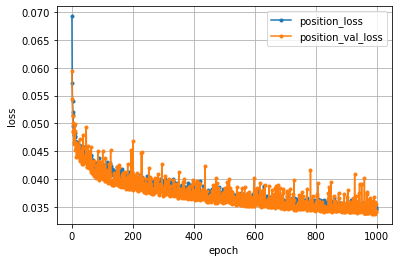

In [9]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
print(position_y_test[0:3])
position_predict = position_model.predict(position_x_test)
print(position_predict[0:3])

[[0.43 0.49]
 [0.14 0.22]
 [0.48 0.7 ]]
[[0.38335758 0.6380064 ]
 [0.19607621 0.57694036]
 [0.45988497 0.5885707 ]]


In [27]:
## CNN(位置)

### modelの作成
position_model2 = Sequential()
### 畳み込み層
position_model2.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model2.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model2.add(Flatten())
### 全結合層
position_model2.add(Dense(2, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model2.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [28]:
# 学習(位置)
epochs = 10000
batch_size = 128
position_history2 = position_model2.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Epoch 1/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.5677 - val_loss: 0.0593 - val_accuracy: 0.6769
Epoch 2/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.6755 - val_loss: 0.0562 - val_accuracy: 0.6611
Epoch 3/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.7108 - val_loss: 0.0528 - val_accuracy: 0.7287
Epoch 4/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.7002 - val_loss: 0.0512 - val_accuracy: 0.7296
Epoch 5/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.7061 - val_loss: 0.0500 - val_accuracy: 0.7889
Epoch 6/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.7241 - val_loss: 0.0496 - val_accuracy: 0.6907
Epoch 7/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.7468 - val_loss: 0.0491 - val_accuracy: 0.8096

Epoch 58/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.7681 - val_loss: 0.0439 - val_accuracy: 0.7247
Epoch 59/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.7523 - val_loss: 0.0436 - val_accuracy: 0.8081
Epoch 60/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.7628 - val_loss: 0.0436 - val_accuracy: 0.7277
Epoch 61/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.7546 - val_loss: 0.0434 - val_accuracy: 0.7336
Epoch 62/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.7345 - val_loss: 0.0419 - val_accuracy: 0.7824
Epoch 63/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.7824 - val_loss: 0.0427 - val_accuracy: 0.7405
Epoch 64/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.7699 - val_loss: 0.0419 - val_accuracy:

Epoch 115/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.7802 - val_loss: 0.0412 - val_accuracy: 0.7533
Epoch 116/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.7769 - val_loss: 0.0448 - val_accuracy: 0.6556
Epoch 117/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.7679 - val_loss: 0.0403 - val_accuracy: 0.8111
Epoch 118/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.7498 - val_loss: 0.0400 - val_accuracy: 0.7667
Epoch 119/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.7770 - val_loss: 0.0409 - val_accuracy: 0.7815
Epoch 120/10000
64/64 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.7593 - val_loss: 0.0422 - val_accuracy: 0.7242
Epoch 121/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.7789 - val_loss: 0.0398 - val_ac

64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7812 - val_loss: 0.0384 - val_accuracy: 0.7815
Epoch 228/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.7736 - val_loss: 0.0383 - val_accuracy: 0.7819
Epoch 229/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.7754 - val_loss: 0.0410 - val_accuracy: 0.7637
Epoch 230/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.7654 - val_loss: 0.0398 - val_accuracy: 0.7440
Epoch 231/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.7755 - val_loss: 0.0382 - val_accuracy: 0.7844
Epoch 232/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.7773 - val_loss: 0.0388 - val_accuracy: 0.7874
Epoch 233/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.7718 - val_loss: 0.0382 - val_accuracy: 0.7859
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.7821 - val_loss: 0.0377 - val_accuracy: 0.7874
Epoch 340/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.7815 - val_loss: 0.0376 - val_accuracy: 0.7874
Epoch 341/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7810 - val_loss: 0.0402 - val_accuracy: 0.7287
Epoch 342/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.7702 - val_loss: 0.0374 - val_accuracy: 0.7805
Epoch 343/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.7835 - val_loss: 0.0371 - val_accuracy: 0.7879
Epoch 344/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.7604 - val_loss: 0.0390 - val_accuracy: 0.7829
Epoch 345/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.7753 - val_loss: 0.0373 - val_accuracy: 0.7903
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.7606 - val_loss: 0.0369 - val_accuracy: 0.7829
Epoch 452/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.7823 - val_loss: 0.0363 - val_accuracy: 0.7903
Epoch 453/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.7760 - val_loss: 0.0364 - val_accuracy: 0.7889
Epoch 454/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.7822 - val_loss: 0.0362 - val_accuracy: 0.7879
Epoch 455/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.7779 - val_loss: 0.0378 - val_accuracy: 0.7854
Epoch 456/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.7811 - val_loss: 0.0377 - val_accuracy: 0.7854
Epoch 457/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.7670 - val_loss: 0.0370 - val_accuracy: 0.7918
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.7697 - val_loss: 0.0373 - val_accuracy: 0.7607
Epoch 564/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7840 - val_loss: 0.0362 - val_accuracy: 0.7884
Epoch 565/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.7733 - val_loss: 0.0378 - val_accuracy: 0.7775
Epoch 566/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.7639 - val_loss: 0.0360 - val_accuracy: 0.7834
Epoch 567/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.7855 - val_loss: 0.0369 - val_accuracy: 0.7884
Epoch 568/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7771 - val_loss: 0.0358 - val_accuracy: 0.7913
Epoch 569/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7798 - val_loss: 0.0381 - val_accuracy: 0.8012
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7839 - val_loss: 0.0357 - val_accuracy: 0.7790
Epoch 676/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7865 - val_loss: 0.0356 - val_accuracy: 0.7874
Epoch 677/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.7832 - val_loss: 0.0353 - val_accuracy: 0.7893
Epoch 678/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7771 - val_loss: 0.0353 - val_accuracy: 0.7913
Epoch 679/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.7826 - val_loss: 0.0352 - val_accuracy: 0.7963
Epoch 680/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7859 - val_loss: 0.0354 - val_accuracy: 0.7854
Epoch 681/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7874 - val_loss: 0.0355 - val_accuracy: 0.7859
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.7849 - val_loss: 0.0351 - val_accuracy: 0.7923
Epoch 788/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.7912 - val_loss: 0.0349 - val_accuracy: 0.8012
Epoch 789/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.7649 - val_loss: 0.0349 - val_accuracy: 0.7923
Epoch 790/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7881 - val_loss: 0.0351 - val_accuracy: 0.8061
Epoch 791/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.7732 - val_loss: 0.0361 - val_accuracy: 0.8041
Epoch 792/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.7856 - val_loss: 0.0354 - val_accuracy: 0.7933
Epoch 793/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.7657 - val_loss: 0.0372 - val_accuracy: 0.7499
E

64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7801 - val_loss: 0.0343 - val_accuracy: 0.7972
Epoch 900/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.7860 - val_loss: 0.0372 - val_accuracy: 0.7449
Epoch 901/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.7819 - val_loss: 0.0348 - val_accuracy: 0.7898
Epoch 902/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7848 - val_loss: 0.0350 - val_accuracy: 0.7854
Epoch 903/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.7797 - val_loss: 0.0372 - val_accuracy: 0.7420
Epoch 904/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7750 - val_loss: 0.0363 - val_accuracy: 0.7839
Epoch 905/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7785 - val_loss: 0.0345 - val_accuracy: 0.7953
E

64/64 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.7860 - val_loss: 0.0343 - val_accuracy: 0.7963
Epoch 1012/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.7833 - val_loss: 0.0373 - val_accuracy: 0.7079
Epoch 1013/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.7801 - val_loss: 0.0377 - val_accuracy: 0.8012
Epoch 1014/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.7918 - val_loss: 0.0342 - val_accuracy: 0.7972
Epoch 1015/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.7827 - val_loss: 0.0341 - val_accuracy: 0.7953
Epoch 1016/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.7892 - val_loss: 0.0356 - val_accuracy: 0.8037
Epoch 1017/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.7911 - val_loss: 0.0366 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7895 - val_loss: 0.0341 - val_accuracy: 0.7982
Epoch 1124/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7791 - val_loss: 0.0361 - val_accuracy: 0.7701
Epoch 1125/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.7638 - val_loss: 0.0355 - val_accuracy: 0.7731
Epoch 1126/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.7769 - val_loss: 0.0344 - val_accuracy: 0.7967
Epoch 1127/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7797 - val_loss: 0.0336 - val_accuracy: 0.7943
Epoch 1128/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.7902 - val_loss: 0.0358 - val_accuracy: 0.7612
Epoch 1129/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7901 - val_loss: 0.0339 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.7902 - val_loss: 0.0334 - val_accuracy: 0.7972
Epoch 1236/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7896 - val_loss: 0.0340 - val_accuracy: 0.7997
Epoch 1237/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.7868 - val_loss: 0.0342 - val_accuracy: 0.7869
Epoch 1238/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.7940 - val_loss: 0.0337 - val_accuracy: 0.8022
Epoch 1239/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.7789 - val_loss: 0.0341 - val_accuracy: 0.7963
Epoch 1240/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.7812 - val_loss: 0.0348 - val_accuracy: 0.7879
Epoch 1241/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.7842 - val_loss: 0.0333 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.7919 - val_loss: 0.0331 - val_accuracy: 0.7938
Epoch 1348/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.7945 - val_loss: 0.0341 - val_accuracy: 0.8027
Epoch 1349/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.7869 - val_loss: 0.0333 - val_accuracy: 0.7958
Epoch 1350/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7876 - val_loss: 0.0347 - val_accuracy: 0.7928
Epoch 1351/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.7896 - val_loss: 0.0330 - val_accuracy: 0.7972
Epoch 1352/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.7856 - val_loss: 0.0339 - val_accuracy: 0.7874
Epoch 1353/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7892 - val_loss: 0.0337 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7933 - val_loss: 0.0345 - val_accuracy: 0.8091
Epoch 1460/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.7905 - val_loss: 0.0340 - val_accuracy: 0.8032
Epoch 1461/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7898 - val_loss: 0.0329 - val_accuracy: 0.7972
Epoch 1462/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.7884 - val_loss: 0.0357 - val_accuracy: 0.7967
Epoch 1463/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7887 - val_loss: 0.0337 - val_accuracy: 0.7928
Epoch 1464/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.7939 - val_loss: 0.0390 - val_accuracy: 0.7958
Epoch 1465/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.7816 - val_loss: 0.0367 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7871 - val_loss: 0.0327 - val_accuracy: 0.8061
Epoch 1572/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.7849 - val_loss: 0.0348 - val_accuracy: 0.8066
Epoch 1573/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7879 - val_loss: 0.0327 - val_accuracy: 0.8066
Epoch 1574/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7926 - val_loss: 0.0329 - val_accuracy: 0.8022
Epoch 1575/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7922 - val_loss: 0.0342 - val_accuracy: 0.7982
Epoch 1576/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.7955 - val_loss: 0.0329 - val_accuracy: 0.8071
Epoch 1577/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.7902 - val_loss: 0.0336 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.7877 - val_loss: 0.0328 - val_accuracy: 0.7987
Epoch 1684/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7916 - val_loss: 0.0329 - val_accuracy: 0.8051
Epoch 1685/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.7921 - val_loss: 0.0327 - val_accuracy: 0.7997
Epoch 1686/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.7908 - val_loss: 0.0341 - val_accuracy: 0.7963
Epoch 1687/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.7933 - val_loss: 0.0326 - val_accuracy: 0.8106
Epoch 1688/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7875 - val_loss: 0.0339 - val_accuracy: 0.7859
Epoch 1689/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.7855 - val_loss: 0.0323 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7900 - val_loss: 0.0321 - val_accuracy: 0.8061
Epoch 1796/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7946 - val_loss: 0.0326 - val_accuracy: 0.8111
Epoch 1797/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7919 - val_loss: 0.0320 - val_accuracy: 0.8066
Epoch 1798/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7956 - val_loss: 0.0322 - val_accuracy: 0.8086
Epoch 1799/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7967 - val_loss: 0.0320 - val_accuracy: 0.7977
Epoch 1800/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7902 - val_loss: 0.0321 - val_accuracy: 0.8081
Epoch 1801/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7954 - val_loss: 0.0341 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7938 - val_loss: 0.0324 - val_accuracy: 0.8150
Epoch 1908/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.7906 - val_loss: 0.0380 - val_accuracy: 0.8111
Epoch 1909/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.7986 - val_loss: 0.0326 - val_accuracy: 0.8041
Epoch 1910/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.7974 - val_loss: 0.0336 - val_accuracy: 0.8037
Epoch 1911/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.7960 - val_loss: 0.0348 - val_accuracy: 0.7992
Epoch 1912/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.7983 - val_loss: 0.0346 - val_accuracy: 0.8012
Epoch 1913/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.7983 - val_loss: 0.0331 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.7992 - val_loss: 0.0332 - val_accuracy: 0.8061
Epoch 2020/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.8024 - val_loss: 0.0319 - val_accuracy: 0.8175
Epoch 2021/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8065 - val_loss: 0.0322 - val_accuracy: 0.8027
Epoch 2022/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.8016 - val_loss: 0.0315 - val_accuracy: 0.8096
Epoch 2023/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8032 - val_loss: 0.0316 - val_accuracy: 0.8096
Epoch 2024/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.8008 - val_loss: 0.0333 - val_accuracy: 0.8180
Epoch 2025/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.8020 - val_loss: 0.0323 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.8006 - val_loss: 0.0325 - val_accuracy: 0.8037
Epoch 2132/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8022 - val_loss: 0.0330 - val_accuracy: 0.8120
Epoch 2133/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8066 - val_loss: 0.0322 - val_accuracy: 0.8150
Epoch 2134/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8040 - val_loss: 0.0321 - val_accuracy: 0.8115
Epoch 2135/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.7998 - val_loss: 0.0319 - val_accuracy: 0.8175
Epoch 2136/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8044 - val_loss: 0.0321 - val_accuracy: 0.8160
Epoch 2137/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7967 - val_loss: 0.0348 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8039 - val_loss: 0.0312 - val_accuracy: 0.8096
Epoch 2244/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.8035 - val_loss: 0.0315 - val_accuracy: 0.8199
Epoch 2245/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8070 - val_loss: 0.0327 - val_accuracy: 0.8106
Epoch 2246/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.7979 - val_loss: 0.0317 - val_accuracy: 0.8199
Epoch 2247/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8064 - val_loss: 0.0344 - val_accuracy: 0.7750
Epoch 2248/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8022 - val_loss: 0.0317 - val_accuracy: 0.8155
Epoch 2249/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8024 - val_loss: 0.0319 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.8038 - val_loss: 0.0322 - val_accuracy: 0.8204
Epoch 2356/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.8096 - val_loss: 0.0317 - val_accuracy: 0.8086
Epoch 2357/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.8016 - val_loss: 0.0334 - val_accuracy: 0.8150
Epoch 2358/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8059 - val_loss: 0.0313 - val_accuracy: 0.8106
Epoch 2359/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8096 - val_loss: 0.0316 - val_accuracy: 0.8115
Epoch 2360/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8062 - val_loss: 0.0316 - val_accuracy: 0.8125
Epoch 2361/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8009 - val_loss: 0.0317 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.8061 - val_loss: 0.0310 - val_accuracy: 0.8244
Epoch 2468/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8093 - val_loss: 0.0311 - val_accuracy: 0.8254
Epoch 2469/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8069 - val_loss: 0.0311 - val_accuracy: 0.8086
Epoch 2470/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8111 - val_loss: 0.0311 - val_accuracy: 0.8259
Epoch 2471/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8029 - val_loss: 0.0318 - val_accuracy: 0.8185
Epoch 2472/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8106 - val_loss: 0.0328 - val_accuracy: 0.8037
Epoch 2473/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8009 - val_loss: 0.0313 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8072 - val_loss: 0.0311 - val_accuracy: 0.8185
Epoch 2580/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8091 - val_loss: 0.0309 - val_accuracy: 0.8249
Epoch 2581/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8118 - val_loss: 0.0336 - val_accuracy: 0.8007
Epoch 2582/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.7951 - val_loss: 0.0314 - val_accuracy: 0.8145
Epoch 2583/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8075 - val_loss: 0.0343 - val_accuracy: 0.7538
Epoch 2584/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8065 - val_loss: 0.0314 - val_accuracy: 0.8263
Epoch 2585/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8162 - val_loss: 0.0325 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8143 - val_loss: 0.0313 - val_accuracy: 0.8155
Epoch 2692/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8102 - val_loss: 0.0331 - val_accuracy: 0.8263
Epoch 2693/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.8078 - val_loss: 0.0329 - val_accuracy: 0.8071
Epoch 2694/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.8048 - val_loss: 0.0318 - val_accuracy: 0.8076
Epoch 2695/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8098 - val_loss: 0.0315 - val_accuracy: 0.8081
Epoch 2696/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8111 - val_loss: 0.0310 - val_accuracy: 0.8135
Epoch 2697/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8061 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8162 - val_loss: 0.0353 - val_accuracy: 0.8066
Epoch 2804/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8102 - val_loss: 0.0318 - val_accuracy: 0.8145
Epoch 2805/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.8046 - val_loss: 0.0308 - val_accuracy: 0.8115
Epoch 2806/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8045 - val_loss: 0.0311 - val_accuracy: 0.8051
Epoch 2807/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8157 - val_loss: 0.0313 - val_accuracy: 0.8214
Epoch 2808/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8129 - val_loss: 0.0318 - val_accuracy: 0.8056
Epoch 2809/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.8093 - val_loss: 0.0316 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8152 - val_loss: 0.0312 - val_accuracy: 0.8175
Epoch 2916/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8107 - val_loss: 0.0318 - val_accuracy: 0.8145
Epoch 2917/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8118 - val_loss: 0.0325 - val_accuracy: 0.7963
Epoch 2918/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8094 - val_loss: 0.0311 - val_accuracy: 0.8318
Epoch 2919/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8109 - val_loss: 0.0308 - val_accuracy: 0.8308
Epoch 2920/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8103 - val_loss: 0.0320 - val_accuracy: 0.8111
Epoch 2921/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8064 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.7988 - val_loss: 0.0325 - val_accuracy: 0.8115
Epoch 3028/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8060 - val_loss: 0.0304 - val_accuracy: 0.8313
Epoch 3029/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8170 - val_loss: 0.0305 - val_accuracy: 0.8313
Epoch 3030/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8157 - val_loss: 0.0314 - val_accuracy: 0.8115
Epoch 3031/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8122 - val_loss: 0.0325 - val_accuracy: 0.8120
Epoch 3032/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8074 - val_loss: 0.0324 - val_accuracy: 0.8071
Epoch 3033/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8090 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8160 - val_loss: 0.0313 - val_accuracy: 0.8096
Epoch 3140/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8103 - val_loss: 0.0321 - val_accuracy: 0.8293
Epoch 3141/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8064 - val_loss: 0.0306 - val_accuracy: 0.8283
Epoch 3142/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8136 - val_loss: 0.0312 - val_accuracy: 0.8111
Epoch 3143/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8189 - val_loss: 0.0313 - val_accuracy: 0.8239
Epoch 3144/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8109 - val_loss: 0.0304 - val_accuracy: 0.8367
Epoch 3145/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.8035 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8098 - val_loss: 0.0306 - val_accuracy: 0.8234
Epoch 3252/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8056 - val_loss: 0.0308 - val_accuracy: 0.8323
Epoch 3253/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8117 - val_loss: 0.0310 - val_accuracy: 0.8145
Epoch 3254/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.8114 - val_loss: 0.0318 - val_accuracy: 0.8224
Epoch 3255/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8133 - val_loss: 0.0309 - val_accuracy: 0.8219
Epoch 3256/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8161 - val_loss: 0.0311 - val_accuracy: 0.8165
Epoch 3257/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8144 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8151 - val_loss: 0.0357 - val_accuracy: 0.8189
Epoch 3364/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.8114 - val_loss: 0.0316 - val_accuracy: 0.8170
Epoch 3365/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8139 - val_loss: 0.0304 - val_accuracy: 0.8372
Epoch 3366/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8167 - val_loss: 0.0310 - val_accuracy: 0.8135
Epoch 3367/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8193 - val_loss: 0.0308 - val_accuracy: 0.8140
Epoch 3368/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8128 - val_loss: 0.0306 - val_accuracy: 0.8180
Epoch 3369/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8210 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8133 - val_loss: 0.0307 - val_accuracy: 0.8155
Epoch 3476/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8134 - val_loss: 0.0312 - val_accuracy: 0.8111
Epoch 3477/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.8099 - val_loss: 0.0318 - val_accuracy: 0.8046
Epoch 3478/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8128 - val_loss: 0.0311 - val_accuracy: 0.8175
Epoch 3479/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.8080 - val_loss: 0.0325 - val_accuracy: 0.8259
Epoch 3480/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8118 - val_loss: 0.0329 - val_accuracy: 0.8288
Epoch 3481/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8160 - val_loss: 0.0302 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8155 - val_loss: 0.0314 - val_accuracy: 0.8421
Epoch 3588/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8161 - val_loss: 0.0303 - val_accuracy: 0.8337
Epoch 3589/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8134 - val_loss: 0.0320 - val_accuracy: 0.8101
Epoch 3590/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8130 - val_loss: 0.0299 - val_accuracy: 0.8357
Epoch 3591/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8124 - val_loss: 0.0307 - val_accuracy: 0.8303
Epoch 3592/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8161 - val_loss: 0.0325 - val_accuracy: 0.7982
Epoch 3593/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8159 - val_loss: 0.0338 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8173 - val_loss: 0.0302 - val_accuracy: 0.8283
Epoch 3700/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8159 - val_loss: 0.0300 - val_accuracy: 0.8426
Epoch 3701/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.8156 - val_loss: 0.0311 - val_accuracy: 0.8091
Epoch 3702/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8180 - val_loss: 0.0300 - val_accuracy: 0.8411
Epoch 3703/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8143 - val_loss: 0.0330 - val_accuracy: 0.8367
Epoch 3704/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.7971 - val_loss: 0.0306 - val_accuracy: 0.8372
Epoch 3705/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8182 - val_loss: 0.0316 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8172 - val_loss: 0.0307 - val_accuracy: 0.8308
Epoch 3812/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8161 - val_loss: 0.0299 - val_accuracy: 0.8416
Epoch 3813/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8204 - val_loss: 0.0301 - val_accuracy: 0.8298
Epoch 3814/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8207 - val_loss: 0.0304 - val_accuracy: 0.8402
Epoch 3815/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8157 - val_loss: 0.0300 - val_accuracy: 0.8318
Epoch 3816/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8155 - val_loss: 0.0328 - val_accuracy: 0.7893
Epoch 3817/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8176 - val_loss: 0.0309 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8234 - val_loss: 0.0313 - val_accuracy: 0.8111
Epoch 3924/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.8155 - val_loss: 0.0337 - val_accuracy: 0.8259
Epoch 3925/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.8117 - val_loss: 0.0302 - val_accuracy: 0.8303
Epoch 3926/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8199 - val_loss: 0.0301 - val_accuracy: 0.8397
Epoch 3927/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8202 - val_loss: 0.0333 - val_accuracy: 0.8268
Epoch 3928/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8205 - val_loss: 0.0302 - val_accuracy: 0.8372
Epoch 3929/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8193 - val_loss: 0.0328 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8236 - val_loss: 0.0309 - val_accuracy: 0.8189
Epoch 4036/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8233 - val_loss: 0.0306 - val_accuracy: 0.8259
Epoch 4037/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8198 - val_loss: 0.0304 - val_accuracy: 0.8224
Epoch 4038/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.8207 - val_loss: 0.0305 - val_accuracy: 0.8416
Epoch 4039/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8117 - val_loss: 0.0320 - val_accuracy: 0.8150
Epoch 4040/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.8109 - val_loss: 0.0308 - val_accuracy: 0.8259
Epoch 4041/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8157 - val_loss: 0.0341 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8236 - val_loss: 0.0312 - val_accuracy: 0.8224
Epoch 4148/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8196 - val_loss: 0.0299 - val_accuracy: 0.8471
Epoch 4149/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8203 - val_loss: 0.0296 - val_accuracy: 0.8476
Epoch 4150/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8218 - val_loss: 0.0333 - val_accuracy: 0.7913
Epoch 4151/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8197 - val_loss: 0.0303 - val_accuracy: 0.8165
Epoch 4152/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8219 - val_loss: 0.0304 - val_accuracy: 0.8313
Epoch 4153/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8170 - val_loss: 0.0315 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8144 - val_loss: 0.0300 - val_accuracy: 0.8426
Epoch 4260/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8160 - val_loss: 0.0341 - val_accuracy: 0.7430
Epoch 4261/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8151 - val_loss: 0.0302 - val_accuracy: 0.8446
Epoch 4262/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8281 - val_loss: 0.0309 - val_accuracy: 0.8471
Epoch 4263/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.8224 - val_loss: 0.0321 - val_accuracy: 0.7992
Epoch 4264/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.8181 - val_loss: 0.0310 - val_accuracy: 0.8204
Epoch 4265/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8265 - val_loss: 0.0307 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8205 - val_loss: 0.0296 - val_accuracy: 0.8293
Epoch 4372/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8245 - val_loss: 0.0297 - val_accuracy: 0.8367
Epoch 4373/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8286 - val_loss: 0.0296 - val_accuracy: 0.8471
Epoch 4374/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8234 - val_loss: 0.0300 - val_accuracy: 0.8268
Epoch 4375/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8081 - val_loss: 0.0304 - val_accuracy: 0.8160
Epoch 4376/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8207 - val_loss: 0.0303 - val_accuracy: 0.8476
Epoch 4377/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8281 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.8256 - val_loss: 0.0302 - val_accuracy: 0.8155
Epoch 4484/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8212 - val_loss: 0.0296 - val_accuracy: 0.8481
Epoch 4485/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8234 - val_loss: 0.0303 - val_accuracy: 0.8180
Epoch 4486/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.8094 - val_loss: 0.0295 - val_accuracy: 0.8490
Epoch 4487/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8188 - val_loss: 0.0305 - val_accuracy: 0.8490
Epoch 4488/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8250 - val_loss: 0.0315 - val_accuracy: 0.8451
Epoch 4489/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8259 - val_loss: 0.0307 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8220 - val_loss: 0.0292 - val_accuracy: 0.8436
Epoch 4596/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8234 - val_loss: 0.0297 - val_accuracy: 0.8199
Epoch 4597/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8270 - val_loss: 0.0308 - val_accuracy: 0.8333
Epoch 4598/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.8129 - val_loss: 0.0316 - val_accuracy: 0.8140
Epoch 4599/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8229 - val_loss: 0.0311 - val_accuracy: 0.8120
Epoch 4600/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8252 - val_loss: 0.0293 - val_accuracy: 0.8337
Epoch 4601/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8244 - val_loss: 0.0293 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8314 - val_loss: 0.0292 - val_accuracy: 0.8485
Epoch 4708/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8223 - val_loss: 0.0315 - val_accuracy: 0.8244
Epoch 4709/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.8242 - val_loss: 0.0357 - val_accuracy: 0.7686
Epoch 4710/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8193 - val_loss: 0.0296 - val_accuracy: 0.8293
Epoch 4711/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.8196 - val_loss: 0.0300 - val_accuracy: 0.8337
Epoch 4712/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8275 - val_loss: 0.0344 - val_accuracy: 0.7790
Epoch 4713/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.8220 - val_loss: 0.0308 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8309 - val_loss: 0.0323 - val_accuracy: 0.8046
Epoch 4820/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8252 - val_loss: 0.0294 - val_accuracy: 0.8397
Epoch 4821/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8225 - val_loss: 0.0296 - val_accuracy: 0.8352
Epoch 4822/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8229 - val_loss: 0.0295 - val_accuracy: 0.8293
Epoch 4823/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8278 - val_loss: 0.0295 - val_accuracy: 0.8500
Epoch 4824/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8261 - val_loss: 0.0309 - val_accuracy: 0.8234
Epoch 4825/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8213 - val_loss: 0.0311 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8271 - val_loss: 0.0294 - val_accuracy: 0.8323
Epoch 4932/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8229 - val_loss: 0.0305 - val_accuracy: 0.8165
Epoch 4933/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8304 - val_loss: 0.0293 - val_accuracy: 0.8426
Epoch 4934/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8275 - val_loss: 0.0290 - val_accuracy: 0.8377
Epoch 4935/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8313 - val_loss: 0.0311 - val_accuracy: 0.8318
Epoch 4936/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8238 - val_loss: 0.0294 - val_accuracy: 0.8347
Epoch 4937/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8186 - val_loss: 0.0297 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.8300 - val_loss: 0.0294 - val_accuracy: 0.8313
Epoch 5044/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8239 - val_loss: 0.0290 - val_accuracy: 0.8510
Epoch 5045/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8263 - val_loss: 0.0303 - val_accuracy: 0.8145
Epoch 5046/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8240 - val_loss: 0.0299 - val_accuracy: 0.8500
Epoch 5047/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8262 - val_loss: 0.0300 - val_accuracy: 0.8352
Epoch 5048/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8247 - val_loss: 0.0296 - val_accuracy: 0.8254
Epoch 5049/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8292 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.8259 - val_loss: 0.0304 - val_accuracy: 0.8451
Epoch 5156/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8289 - val_loss: 0.0342 - val_accuracy: 0.8402
Epoch 5157/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8218 - val_loss: 0.0300 - val_accuracy: 0.8402
Epoch 5158/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8234 - val_loss: 0.0290 - val_accuracy: 0.8525
Epoch 5159/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8299 - val_loss: 0.0293 - val_accuracy: 0.8244
Epoch 5160/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8310 - val_loss: 0.0300 - val_accuracy: 0.8436
Epoch 5161/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8260 - val_loss: 0.0300 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8336 - val_loss: 0.0296 - val_accuracy: 0.8234
Epoch 5268/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8308 - val_loss: 0.0312 - val_accuracy: 0.8175
Epoch 5269/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8228 - val_loss: 0.0308 - val_accuracy: 0.8199
Epoch 5270/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8247 - val_loss: 0.0290 - val_accuracy: 0.8481
Epoch 5271/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8293 - val_loss: 0.0305 - val_accuracy: 0.8481
Epoch 5272/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8325 - val_loss: 0.0296 - val_accuracy: 0.8461
Epoch 5273/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8219 - val_loss: 0.0301 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.8176 - val_loss: 0.0292 - val_accuracy: 0.8540
Epoch 5380/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8292 - val_loss: 0.0310 - val_accuracy: 0.8140
Epoch 5381/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.8162 - val_loss: 0.0292 - val_accuracy: 0.8337
Epoch 5382/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8181 - val_loss: 0.0326 - val_accuracy: 0.8214
Epoch 5383/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8336 - val_loss: 0.0295 - val_accuracy: 0.8362
Epoch 5384/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8255 - val_loss: 0.0326 - val_accuracy: 0.8101
Epoch 5385/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.8222 - val_loss: 0.0301 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.8315 - val_loss: 0.0289 - val_accuracy: 0.8520
Epoch 5492/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8283 - val_loss: 0.0291 - val_accuracy: 0.8342
Epoch 5493/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8255 - val_loss: 0.0296 - val_accuracy: 0.8471
Epoch 5494/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8235 - val_loss: 0.0295 - val_accuracy: 0.8392
Epoch 5495/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8362 - val_loss: 0.0290 - val_accuracy: 0.8495
Epoch 5496/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.8376 - val_loss: 0.0290 - val_accuracy: 0.8362
Epoch 5497/10000
64/64 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.8386 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.8337 - val_loss: 0.0296 - val_accuracy: 0.8367
Epoch 5604/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8366 - val_loss: 0.0290 - val_accuracy: 0.8431
Epoch 5605/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8310 - val_loss: 0.0294 - val_accuracy: 0.8441
Epoch 5606/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8288 - val_loss: 0.0288 - val_accuracy: 0.8471
Epoch 5607/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.8337 - val_loss: 0.0309 - val_accuracy: 0.8367
Epoch 5608/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.8345 - val_loss: 0.0288 - val_accuracy: 0.8333
Epoch 5609/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.8316 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8141 - val_loss: 0.0330 - val_accuracy: 0.7933
Epoch 5716/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8331 - val_loss: 0.0305 - val_accuracy: 0.8155
Epoch 5717/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8314 - val_loss: 0.0290 - val_accuracy: 0.8278
Epoch 5718/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8303 - val_loss: 0.0300 - val_accuracy: 0.8259
Epoch 5719/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8304 - val_loss: 0.0295 - val_accuracy: 0.8328
Epoch 5720/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8365 - val_loss: 0.0331 - val_accuracy: 0.7898
Epoch 5721/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.8277 - val_loss: 0.0312 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.8296 - val_loss: 0.0292 - val_accuracy: 0.8313
Epoch 5828/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8329 - val_loss: 0.0285 - val_accuracy: 0.8569
Epoch 5829/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8379 - val_loss: 0.0291 - val_accuracy: 0.8495
Epoch 5830/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8363 - val_loss: 0.0322 - val_accuracy: 0.8076
Epoch 5831/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8313 - val_loss: 0.0290 - val_accuracy: 0.8402
Epoch 5832/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8331 - val_loss: 0.0299 - val_accuracy: 0.8234
Epoch 5833/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.8277 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8334 - val_loss: 0.0307 - val_accuracy: 0.8594
Epoch 5940/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8292 - val_loss: 0.0287 - val_accuracy: 0.8564
Epoch 5941/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.8366 - val_loss: 0.0314 - val_accuracy: 0.8204
Epoch 5942/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.8266 - val_loss: 0.0290 - val_accuracy: 0.8342
Epoch 5943/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8266 - val_loss: 0.0300 - val_accuracy: 0.8323
Epoch 5944/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8312 - val_loss: 0.0291 - val_accuracy: 0.8263
Epoch 5945/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8367 - val_loss: 0.0296 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8404 - val_loss: 0.0313 - val_accuracy: 0.8303
Epoch 6052/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8339 - val_loss: 0.0285 - val_accuracy: 0.8564
Epoch 6053/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8399 - val_loss: 0.0286 - val_accuracy: 0.8481
Epoch 6054/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8407 - val_loss: 0.0285 - val_accuracy: 0.8599
Epoch 6055/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8381 - val_loss: 0.0290 - val_accuracy: 0.8574
Epoch 6056/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8355 - val_loss: 0.0301 - val_accuracy: 0.8446
Epoch 6057/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8329 - val_loss: 0.0302 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8288 - val_loss: 0.0296 - val_accuracy: 0.8204
Epoch 6164/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8345 - val_loss: 0.0300 - val_accuracy: 0.8239
Epoch 6165/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8342 - val_loss: 0.0305 - val_accuracy: 0.8209
Epoch 6166/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8312 - val_loss: 0.0292 - val_accuracy: 0.8234
Epoch 6167/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8298 - val_loss: 0.0287 - val_accuracy: 0.8505
Epoch 6168/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8303 - val_loss: 0.0301 - val_accuracy: 0.8150
Epoch 6169/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8298 - val_loss: 0.0291 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8297 - val_loss: 0.0286 - val_accuracy: 0.8545
Epoch 6276/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8305 - val_loss: 0.0302 - val_accuracy: 0.8387
Epoch 6277/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8263 - val_loss: 0.0304 - val_accuracy: 0.8397
Epoch 6278/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.8353 - val_loss: 0.0289 - val_accuracy: 0.8510
Epoch 6279/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8419 - val_loss: 0.0316 - val_accuracy: 0.8490
Epoch 6280/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8292 - val_loss: 0.0289 - val_accuracy: 0.8372
Epoch 6281/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8323 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.8304 - val_loss: 0.0289 - val_accuracy: 0.8268
Epoch 6388/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.8399 - val_loss: 0.0287 - val_accuracy: 0.8599
Epoch 6389/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8372 - val_loss: 0.0285 - val_accuracy: 0.8416
Epoch 6390/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8326 - val_loss: 0.0294 - val_accuracy: 0.8347
Epoch 6391/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8355 - val_loss: 0.0287 - val_accuracy: 0.8407
Epoch 6392/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8324 - val_loss: 0.0284 - val_accuracy: 0.8397
Epoch 6393/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8392 - val_loss: 0.0292 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8352 - val_loss: 0.0286 - val_accuracy: 0.8559
Epoch 6500/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.8378 - val_loss: 0.0290 - val_accuracy: 0.8352
Epoch 6501/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.8244 - val_loss: 0.0291 - val_accuracy: 0.8199
Epoch 6502/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8349 - val_loss: 0.0292 - val_accuracy: 0.8579
Epoch 6503/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8409 - val_loss: 0.0290 - val_accuracy: 0.8461
Epoch 6504/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8360 - val_loss: 0.0290 - val_accuracy: 0.8392
Epoch 6505/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.8394 - val_loss: 0.0304 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8405 - val_loss: 0.0293 - val_accuracy: 0.8239
Epoch 6612/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.8378 - val_loss: 0.0286 - val_accuracy: 0.8441
Epoch 6613/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8344 - val_loss: 0.0288 - val_accuracy: 0.8481
Epoch 6614/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8379 - val_loss: 0.0287 - val_accuracy: 0.8333
Epoch 6615/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8379 - val_loss: 0.0313 - val_accuracy: 0.7943
Epoch 6616/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8414 - val_loss: 0.0283 - val_accuracy: 0.8392
Epoch 6617/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8371 - val_loss: 0.0283 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8363 - val_loss: 0.0295 - val_accuracy: 0.8185
Epoch 6724/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8351 - val_loss: 0.0292 - val_accuracy: 0.8293
Epoch 6725/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.8419 - val_loss: 0.0319 - val_accuracy: 0.8520
Epoch 6726/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8355 - val_loss: 0.0291 - val_accuracy: 0.8584
Epoch 6727/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8383 - val_loss: 0.0282 - val_accuracy: 0.8451
Epoch 6728/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.8325 - val_loss: 0.0286 - val_accuracy: 0.8485
Epoch 6729/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8352 - val_loss: 0.0288 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8340 - val_loss: 0.0289 - val_accuracy: 0.8273
Epoch 6836/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.8382 - val_loss: 0.0285 - val_accuracy: 0.8377
Epoch 6837/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8444 - val_loss: 0.0282 - val_accuracy: 0.8407
Epoch 6838/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8400 - val_loss: 0.0295 - val_accuracy: 0.8229
Epoch 6839/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8363 - val_loss: 0.0283 - val_accuracy: 0.8392
Epoch 6840/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.8344 - val_loss: 0.0293 - val_accuracy: 0.8594
Epoch 6841/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.8436 - val_loss: 0.0289 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8398 - val_loss: 0.0284 - val_accuracy: 0.8451
Epoch 6948/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8427 - val_loss: 0.0292 - val_accuracy: 0.8550
Epoch 6949/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8381 - val_loss: 0.0289 - val_accuracy: 0.8525
Epoch 6950/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8400 - val_loss: 0.0302 - val_accuracy: 0.8199
Epoch 6951/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8358 - val_loss: 0.0284 - val_accuracy: 0.8614
Epoch 6952/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8342 - val_loss: 0.0290 - val_accuracy: 0.8540
Epoch 6953/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8386 - val_loss: 0.0306 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.8345 - val_loss: 0.0284 - val_accuracy: 0.8550
Epoch 7060/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8339 - val_loss: 0.0317 - val_accuracy: 0.8199
Epoch 7061/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8368 - val_loss: 0.0309 - val_accuracy: 0.8293
Epoch 7062/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8330 - val_loss: 0.0284 - val_accuracy: 0.8490
Epoch 7063/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8367 - val_loss: 0.0282 - val_accuracy: 0.8604
Epoch 7064/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8404 - val_loss: 0.0288 - val_accuracy: 0.8490
Epoch 7065/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8377 - val_loss: 0.0286 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.8398 - val_loss: 0.0284 - val_accuracy: 0.8569
Epoch 7172/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8409 - val_loss: 0.0283 - val_accuracy: 0.8520
Epoch 7173/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8442 - val_loss: 0.0290 - val_accuracy: 0.8268
Epoch 7174/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8362 - val_loss: 0.0285 - val_accuracy: 0.8392
Epoch 7175/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8388 - val_loss: 0.0334 - val_accuracy: 0.8377
Epoch 7176/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8399 - val_loss: 0.0284 - val_accuracy: 0.8520
Epoch 7177/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8353 - val_loss: 0.0295 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8384 - val_loss: 0.0285 - val_accuracy: 0.8352
Epoch 7284/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8425 - val_loss: 0.0293 - val_accuracy: 0.8239
Epoch 7285/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8393 - val_loss: 0.0285 - val_accuracy: 0.8574
Epoch 7286/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8383 - val_loss: 0.0294 - val_accuracy: 0.8214
Epoch 7287/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8357 - val_loss: 0.0299 - val_accuracy: 0.8111
Epoch 7288/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8442 - val_loss: 0.0282 - val_accuracy: 0.8540
Epoch 7289/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8324 - val_loss: 0.0297 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8374 - val_loss: 0.0287 - val_accuracy: 0.8347
Epoch 7396/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8324 - val_loss: 0.0282 - val_accuracy: 0.8466
Epoch 7397/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8373 - val_loss: 0.0284 - val_accuracy: 0.8530
Epoch 7398/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8419 - val_loss: 0.0284 - val_accuracy: 0.8397
Epoch 7399/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8362 - val_loss: 0.0307 - val_accuracy: 0.8505
Epoch 7400/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8381 - val_loss: 0.0290 - val_accuracy: 0.8559
Epoch 7401/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.8314 - val_loss: 0.0286 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8339 - val_loss: 0.0314 - val_accuracy: 0.8125
Epoch 7508/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8381 - val_loss: 0.0281 - val_accuracy: 0.8555
Epoch 7509/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8414 - val_loss: 0.0292 - val_accuracy: 0.8224
Epoch 7510/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.8386 - val_loss: 0.0307 - val_accuracy: 0.7997
Epoch 7511/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8349 - val_loss: 0.0280 - val_accuracy: 0.8559
Epoch 7512/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8403 - val_loss: 0.0284 - val_accuracy: 0.8520
Epoch 7513/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8341 - val_loss: 0.0290 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.8460 - val_loss: 0.0288 - val_accuracy: 0.8564
Epoch 7620/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.8425 - val_loss: 0.0287 - val_accuracy: 0.8569
Epoch 7621/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8424 - val_loss: 0.0287 - val_accuracy: 0.8283
Epoch 7622/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8378 - val_loss: 0.0319 - val_accuracy: 0.8125
Epoch 7623/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8368 - val_loss: 0.0305 - val_accuracy: 0.8313
Epoch 7624/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.8356 - val_loss: 0.0308 - val_accuracy: 0.8397
Epoch 7625/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8399 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8424 - val_loss: 0.0281 - val_accuracy: 0.8555
Epoch 7732/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8437 - val_loss: 0.0288 - val_accuracy: 0.8441
Epoch 7733/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8390 - val_loss: 0.0284 - val_accuracy: 0.8337
Epoch 7734/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8436 - val_loss: 0.0280 - val_accuracy: 0.8559
Epoch 7735/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.8349 - val_loss: 0.0288 - val_accuracy: 0.8392
Epoch 7736/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8419 - val_loss: 0.0291 - val_accuracy: 0.8535
Epoch 7737/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.8372 - val_loss: 0.0298 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8448 - val_loss: 0.0280 - val_accuracy: 0.8471
Epoch 7844/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.8356 - val_loss: 0.0279 - val_accuracy: 0.8550
Epoch 7845/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8373 - val_loss: 0.0286 - val_accuracy: 0.8436
Epoch 7846/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8337 - val_loss: 0.0292 - val_accuracy: 0.8564
Epoch 7847/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8362 - val_loss: 0.0286 - val_accuracy: 0.8421
Epoch 7848/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8458 - val_loss: 0.0279 - val_accuracy: 0.8535
Epoch 7849/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8487 - val_loss: 0.0291 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8427 - val_loss: 0.0281 - val_accuracy: 0.8535
Epoch 7956/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8477 - val_loss: 0.0287 - val_accuracy: 0.8244
Epoch 7957/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8458 - val_loss: 0.0283 - val_accuracy: 0.8476
Epoch 7958/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8389 - val_loss: 0.0327 - val_accuracy: 0.8564
Epoch 7959/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8463 - val_loss: 0.0281 - val_accuracy: 0.8559
Epoch 7960/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8447 - val_loss: 0.0290 - val_accuracy: 0.8456
Epoch 7961/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8386 - val_loss: 0.0287 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8460 - val_loss: 0.0292 - val_accuracy: 0.8431
Epoch 8068/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8404 - val_loss: 0.0291 - val_accuracy: 0.8594
Epoch 8069/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8393 - val_loss: 0.0281 - val_accuracy: 0.8377
Epoch 8070/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8367 - val_loss: 0.0301 - val_accuracy: 0.8091
Epoch 8071/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8394 - val_loss: 0.0331 - val_accuracy: 0.8555
Epoch 8072/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8469 - val_loss: 0.0280 - val_accuracy: 0.8579
Epoch 8073/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8387 - val_loss: 0.0292 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8497 - val_loss: 0.0296 - val_accuracy: 0.8342
Epoch 8180/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.8399 - val_loss: 0.0280 - val_accuracy: 0.8407
Epoch 8181/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8430 - val_loss: 0.0279 - val_accuracy: 0.8589
Epoch 8182/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8420 - val_loss: 0.0285 - val_accuracy: 0.8352
Epoch 8183/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8487 - val_loss: 0.0279 - val_accuracy: 0.8540
Epoch 8184/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8482 - val_loss: 0.0281 - val_accuracy: 0.8313
Epoch 8185/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8415 - val_loss: 0.0281 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.8402 - val_loss: 0.0293 - val_accuracy: 0.8219
Epoch 8292/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.8416 - val_loss: 0.0283 - val_accuracy: 0.8599
Epoch 8293/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.8420 - val_loss: 0.0279 - val_accuracy: 0.8431
Epoch 8294/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8419 - val_loss: 0.0279 - val_accuracy: 0.8569
Epoch 8295/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8431 - val_loss: 0.0280 - val_accuracy: 0.8584
Epoch 8296/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8450 - val_loss: 0.0278 - val_accuracy: 0.8569
Epoch 8297/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8460 - val_loss: 0.0299 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8431 - val_loss: 0.0294 - val_accuracy: 0.8589
Epoch 8404/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.8272 - val_loss: 0.0303 - val_accuracy: 0.8002
Epoch 8405/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8328 - val_loss: 0.0298 - val_accuracy: 0.8303
Epoch 8406/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8393 - val_loss: 0.0287 - val_accuracy: 0.8209
Epoch 8407/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8347 - val_loss: 0.0287 - val_accuracy: 0.8604
Epoch 8408/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8426 - val_loss: 0.0292 - val_accuracy: 0.8293
Epoch 8409/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8434 - val_loss: 0.0282 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8409 - val_loss: 0.0291 - val_accuracy: 0.8584
Epoch 8516/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8479 - val_loss: 0.0277 - val_accuracy: 0.8530
Epoch 8517/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8389 - val_loss: 0.0290 - val_accuracy: 0.8525
Epoch 8518/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8515 - val_loss: 0.0305 - val_accuracy: 0.7987
Epoch 8519/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8397 - val_loss: 0.0286 - val_accuracy: 0.8515
Epoch 8520/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.8360 - val_loss: 0.0282 - val_accuracy: 0.8362
Epoch 8521/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8432 - val_loss: 0.0279 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8455 - val_loss: 0.0299 - val_accuracy: 0.8061
Epoch 8628/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8389 - val_loss: 0.0277 - val_accuracy: 0.8495
Epoch 8629/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.8405 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 8630/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.8444 - val_loss: 0.0291 - val_accuracy: 0.8594
Epoch 8631/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8479 - val_loss: 0.0279 - val_accuracy: 0.8426
Epoch 8632/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.8455 - val_loss: 0.0284 - val_accuracy: 0.8559
Epoch 8633/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8425 - val_loss: 0.0300 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8399 - val_loss: 0.0292 - val_accuracy: 0.8619
Epoch 8740/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8455 - val_loss: 0.0285 - val_accuracy: 0.8594
Epoch 8741/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.8379 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 8742/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8501 - val_loss: 0.0284 - val_accuracy: 0.8555
Epoch 8743/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8504 - val_loss: 0.0289 - val_accuracy: 0.8495
Epoch 8744/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8392 - val_loss: 0.0327 - val_accuracy: 0.7948
Epoch 8745/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8381 - val_loss: 0.0281 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8405 - val_loss: 0.0283 - val_accuracy: 0.8594
Epoch 8852/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8393 - val_loss: 0.0278 - val_accuracy: 0.8402
Epoch 8853/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8464 - val_loss: 0.0291 - val_accuracy: 0.8219
Epoch 8854/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8378 - val_loss: 0.0295 - val_accuracy: 0.8584
Epoch 8855/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8453 - val_loss: 0.0278 - val_accuracy: 0.8530
Epoch 8856/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8492 - val_loss: 0.0287 - val_accuracy: 0.8347
Epoch 8857/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8447 - val_loss: 0.0278 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8399 - val_loss: 0.0299 - val_accuracy: 0.8471
Epoch 8964/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8379 - val_loss: 0.0316 - val_accuracy: 0.8115
Epoch 8965/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8479 - val_loss: 0.0341 - val_accuracy: 0.8214
Epoch 8966/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.8356 - val_loss: 0.0283 - val_accuracy: 0.8328
Epoch 8967/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8384 - val_loss: 0.0276 - val_accuracy: 0.8545
Epoch 8968/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.8440 - val_loss: 0.0306 - val_accuracy: 0.8545
Epoch 8969/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8446 - val_loss: 0.0285 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8400 - val_loss: 0.0299 - val_accuracy: 0.8559
Epoch 9076/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8445 - val_loss: 0.0280 - val_accuracy: 0.8318
Epoch 9077/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8427 - val_loss: 0.0286 - val_accuracy: 0.8614
Epoch 9078/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8384 - val_loss: 0.0275 - val_accuracy: 0.8515
Epoch 9079/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8473 - val_loss: 0.0277 - val_accuracy: 0.8555
Epoch 9080/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8420 - val_loss: 0.0292 - val_accuracy: 0.8421
Epoch 9081/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8383 - val_loss: 0.0277 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.8397 - val_loss: 0.0275 - val_accuracy: 0.8535
Epoch 9188/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8451 - val_loss: 0.0280 - val_accuracy: 0.8461
Epoch 9189/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8500 - val_loss: 0.0279 - val_accuracy: 0.8589
Epoch 9190/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8505 - val_loss: 0.0275 - val_accuracy: 0.8555
Epoch 9191/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8489 - val_loss: 0.0280 - val_accuracy: 0.8357
Epoch 9192/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.8389 - val_loss: 0.0284 - val_accuracy: 0.8604
Epoch 9193/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8437 - val_loss: 0.0280 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8441 - val_loss: 0.0308 - val_accuracy: 0.8658
Epoch 9300/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8478 - val_loss: 0.0276 - val_accuracy: 0.8574
Epoch 9301/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.8328 - val_loss: 0.0275 - val_accuracy: 0.8579
Epoch 9302/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8441 - val_loss: 0.0290 - val_accuracy: 0.8505
Epoch 9303/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8416 - val_loss: 0.0288 - val_accuracy: 0.8224
Epoch 9304/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.8456 - val_loss: 0.0274 - val_accuracy: 0.8574
Epoch 9305/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8511 - val_loss: 0.0305 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.8432 - val_loss: 0.0300 - val_accuracy: 0.8540
Epoch 9412/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8501 - val_loss: 0.0300 - val_accuracy: 0.8061
Epoch 9413/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8460 - val_loss: 0.0276 - val_accuracy: 0.8555
Epoch 9414/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8477 - val_loss: 0.0279 - val_accuracy: 0.8559
Epoch 9415/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8432 - val_loss: 0.0279 - val_accuracy: 0.8446
Epoch 9416/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8527 - val_loss: 0.0312 - val_accuracy: 0.8525
Epoch 9417/10000
64/64 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.8437 - val_loss: 0.0274 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8399 - val_loss: 0.0278 - val_accuracy: 0.8619
Epoch 9524/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8436 - val_loss: 0.0285 - val_accuracy: 0.8273
Epoch 9525/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.8482 - val_loss: 0.0279 - val_accuracy: 0.8352
Epoch 9526/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8479 - val_loss: 0.0276 - val_accuracy: 0.8540
Epoch 9527/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.8424 - val_loss: 0.0272 - val_accuracy: 0.8589
Epoch 9528/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8378 - val_loss: 0.0361 - val_accuracy: 0.8041
Epoch 9529/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.8271 - val_loss: 0.0294 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8481 - val_loss: 0.0289 - val_accuracy: 0.8624
Epoch 9636/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8463 - val_loss: 0.0283 - val_accuracy: 0.8535
Epoch 9637/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.8483 - val_loss: 0.0286 - val_accuracy: 0.8604
Epoch 9638/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8476 - val_loss: 0.0287 - val_accuracy: 0.8599
Epoch 9639/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8461 - val_loss: 0.0280 - val_accuracy: 0.8545
Epoch 9640/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.8424 - val_loss: 0.0295 - val_accuracy: 0.8106
Epoch 9641/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8429 - val_loss: 0.0310 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8457 - val_loss: 0.0287 - val_accuracy: 0.8194
Epoch 9748/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8442 - val_loss: 0.0295 - val_accuracy: 0.8091
Epoch 9749/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8440 - val_loss: 0.0285 - val_accuracy: 0.8594
Epoch 9750/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.8511 - val_loss: 0.0273 - val_accuracy: 0.8555
Epoch 9751/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8481 - val_loss: 0.0277 - val_accuracy: 0.8633
Epoch 9752/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.8397 - val_loss: 0.0317 - val_accuracy: 0.8155
Epoch 9753/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8405 - val_loss: 0.0279 - val_accuracy: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.8405 - val_loss: 0.0277 - val_accuracy: 0.8352
Epoch 9860/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.8488 - val_loss: 0.0280 - val_accuracy: 0.8624
Epoch 9861/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.8450 - val_loss: 0.0284 - val_accuracy: 0.8352
Epoch 9862/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.8466 - val_loss: 0.0274 - val_accuracy: 0.8545
Epoch 9863/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.8474 - val_loss: 0.0276 - val_accuracy: 0.8629
Epoch 9864/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.8499 - val_loss: 0.0278 - val_accuracy: 0.8564
Epoch 9865/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.8330 - val_loss: 0.0277 - val_accuracy: 0.

64/64 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.8477 - val_loss: 0.0282 - val_accuracy: 0.8283
Epoch 9972/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.8494 - val_loss: 0.0280 - val_accuracy: 0.8599
Epoch 9973/10000
64/64 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.8460 - val_loss: 0.0283 - val_accuracy: 0.8648
Epoch 9974/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.8487 - val_loss: 0.0280 - val_accuracy: 0.8337
Epoch 9975/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.8468 - val_loss: 0.0272 - val_accuracy: 0.8564
Epoch 9976/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.8460 - val_loss: 0.0273 - val_accuracy: 0.8569
Epoch 9977/10000
64/64 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.8450 - val_loss: 0.0274 - val_accuracy: 0.

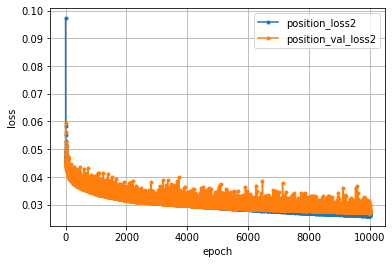

In [29]:
# 学習経過の可視化(大きさ)
position_loss2     = position_history2.history['loss']
position_val_loss2 = position_history2.history['val_loss']

nb_epoch2 = len(position_loss2)
plt.plot(range(nb_epoch2), position_loss2,     marker='.', label='position_loss2')
plt.plot(range(nb_epoch2), position_val_loss2, marker='.', label='position_val_loss2')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
print(position_y_test[0:3])
position_predict2 = position_model2.predict(position_x_test)
print(position_predict2[0:3])

[[0.43 0.49]
 [0.14 0.22]
 [0.48 0.7 ]]
[[0.46933287 0.62916183]
 [0.14021985 0.55939484]
 [0.46275967 0.61023116]]


In [35]:
position_predict2 = position_model2.predict(position_x_test)
position_ok = 0
for i in range(len(position_predict2)):
    if ((position_predict2[i][0]-position_y_test[i][0])**2+(position_predict2[i][1]-position_y_test[i][1])**2) < 0.25**2:
        position_ok = position_ok + 1
print(position_ok/len(position_predict2))

0.7113961519486927
